# Homework 3 (due 20th November, 11:59 PM)

1.  Use Iris dataset with only two features, namely petal length (cm) and petal width (cm).
2.  Convert your data into a two-class dataset, such that Virginica (class=2) will be one class and Setosa and Versicolor (class=1 and class=0) samples will constitute the other class. (Note: represent both of those classes as a single class)
3.  Get your new dataset ready to be fed into the provided plot_2d_examples function. (Check week 8 lecture ipynb file and library documentation.)
4.  Using plot_2d_examples function, evaluate (plot side-by-side) different SVM classifiers with **polynomial kernels of varying degrees**. Also, try several **$C$** values.


You should be able to get some figures like this:

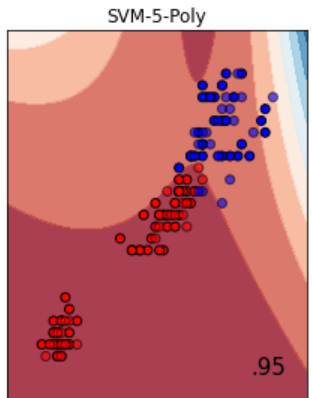

5.  Do not separate the train/test sets by yourselves, just feed into plot_2d_examples. It has its own split inside. Also it prints test set scores on the bottom right corner of each figure. According to these scores, which (degree,$C$) pair produced the best results? Please indicate your answer explicitly.
6.  Also comment on $C$ values. Which $C$ value range is reasonable do you think? After which value, it looks like an overfit?

**Important Note: Write your answers to Q5 and Q6 as two different markdown cell in Jupyter Notebook under your figures.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.datasets import load_iris


In [2]:
iris_dataset = load_iris()  #load dataset
iris_df = pd.DataFrame(data=np.c_[iris_dataset['data'], iris_dataset['target']],columns= list(iris_dataset['feature_names']) + ['target'])  #create dataframe
iris_df = iris_df[['petal length (cm)', 'petal width (cm)', 'target']]  #we choose only two features (petal length, petal width) and target
iris_df.loc[iris_df['target'] == 1.0, 'target'] = 0   #If the target is class 0 and class 1, their new class will be 0.
iris_df.loc[iris_df['target'] == 2.0, 'target'] = 1   #If the target is class2, their new class will be 1.
display(iris_df)

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
145,5.2,2.3,1.0
146,5.0,1.9,1.0
147,5.2,2.0,1.0
148,5.4,2.3,1.0


In [3]:
#This function is taken from lecture 8 ipynb file.
def plot_2d_examples(classifiers, names, datasets, figsize=(27,9), h = .02): 
  """
  Here we define a helper method. We want to make a lot of visualizations, so lets 
  organize the visualization code into a method we can re-use. 
  - classifiers is a list of scikit-learn classifier objects
  - names is a list of strings corresponding to each classifier in 'classifiers'. As such they should have the same length
  - datasets will be a list of 2D datasets, each being a tuple of (X, y)
  - h is the step size of the mesh. Smaller sizes show more detail
  """
  figure = plt.figure(figsize=figsize)
  i = 1
    
  # iterate over datasets
  for ds_cnt, ds in enumerate(datasets):
      # preprocess dataset, split into training and test part
      X, y = ds
      X = StandardScaler().fit_transform(X)
      X_train, X_test, y_train, y_test = \
          train_test_split(X, y, test_size=.4, random_state=42)

      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))

      # just plot the dataset first
      cm = plt.cm.RdBu
      cm_bright = ListedColormap(['#FF0000', '#0000FF'])
      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
      if ds_cnt == 0:
          ax.set_title("Input data")
      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                 edgecolors='k')
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
                 edgecolors='k')
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())
      i += 1

      # iterate over classifiers
      for name, clf in zip(names, classifiers):
          ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
          clf.fit(X_train, y_train)
          score = clf.score(X_test, y_test)

          # Plot the decision boundary. For that, we will assign a color to each
          # point in the mesh [x_min, x_max]x[y_min, y_max].
          if hasattr(clf, "decision_function"):
              Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
          else:
              Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

          # Put the result into a color plot
          Z = Z.reshape(xx.shape)
          ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

          # Plot the training points
          ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                     edgecolors='k')
          # Plot the testing points
          ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                     edgecolors='k', alpha=0.3)

          ax.set_xlim(xx.min(), xx.max())
          ax.set_ylim(yy.min(), yy.max())
          ax.set_xticks(())
          ax.set_yticks(())
          if ds_cnt == 0:
              ax.set_title(name)
          ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                  size=15, horizontalalignment='right')
          i += 1

  plt.tight_layout()
  plt.show()



In [4]:
#The process of converting to dataset suitable for dataframe plot_2d examples_function

iris_datasets = [list(iris_df['petal length (cm)']) , list(iris_df['petal width (cm)']) , list(iris_df['target'])]
iris_ds = []

for i in range(len(iris_datasets[0])):
  iris_ds.append([iris_datasets[0][i], iris_datasets[1][i]])
iris = [(np.array(iris_ds),np.array(iris_datasets[2]))]     #list of ([petal lengths, petal widths], targets)


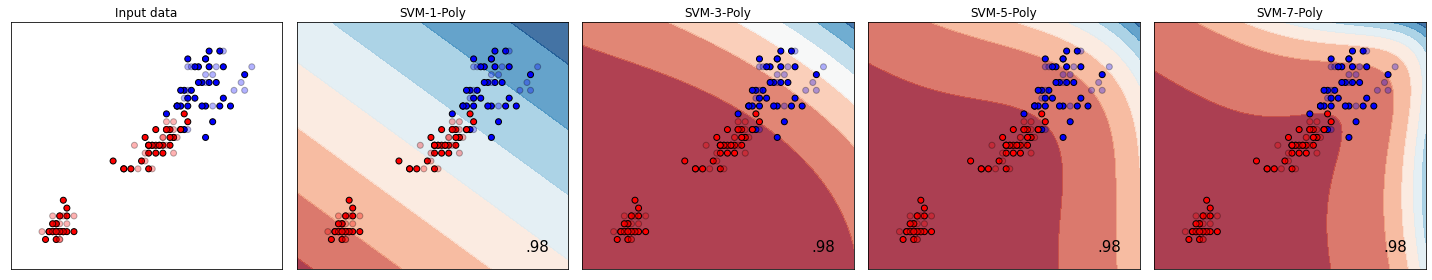

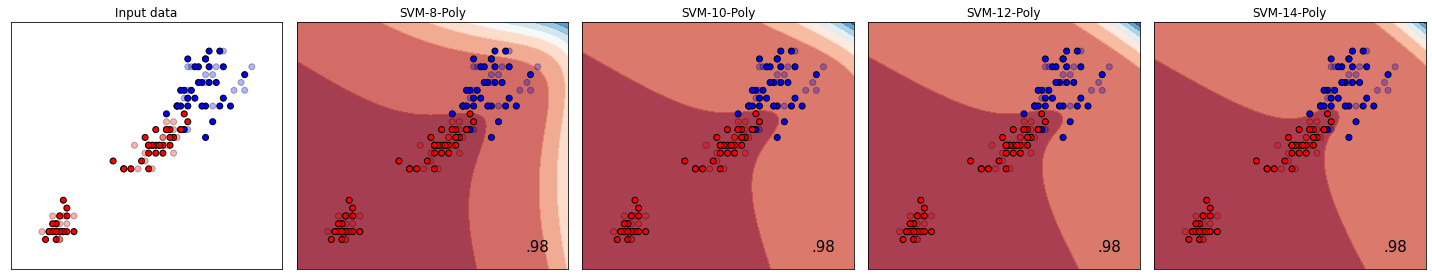

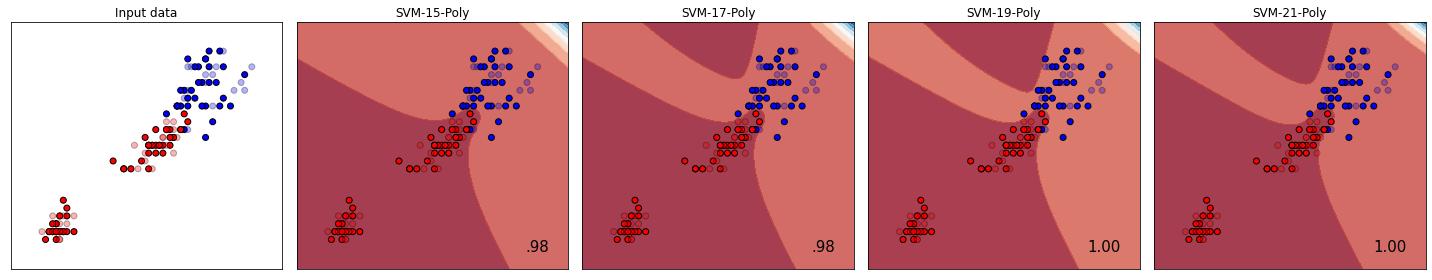

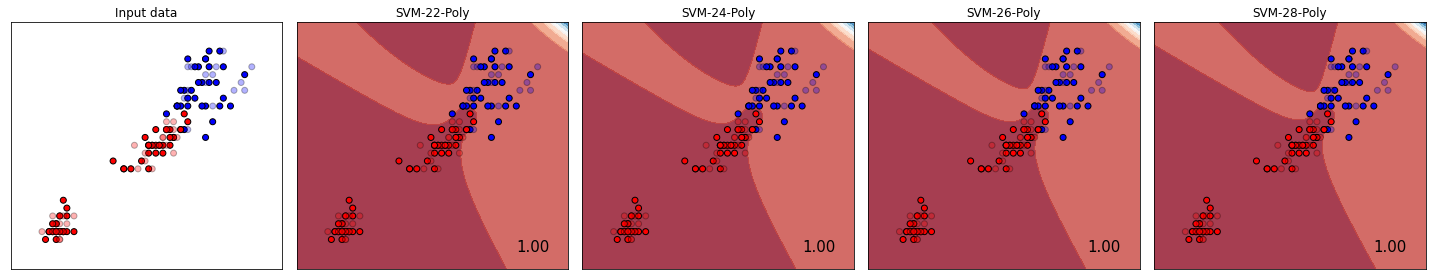

In [5]:
classifiers = []  #holds classifier according to degree parameter
names = []
current=1
last=29
step=8
while current < last: #I used this loop to get the graphics to print properly (5.4) matrix
  for i in range(current,step,2):  #only use odd degree
    classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', coef0=1.0))
    names.append("SVM-"+str(i)+"-Poly")
  plot_2d_examples(classifiers, names, iris, figsize=(20,4))
  classifiers = []
  names = [] 
  current += 7
  step += 7



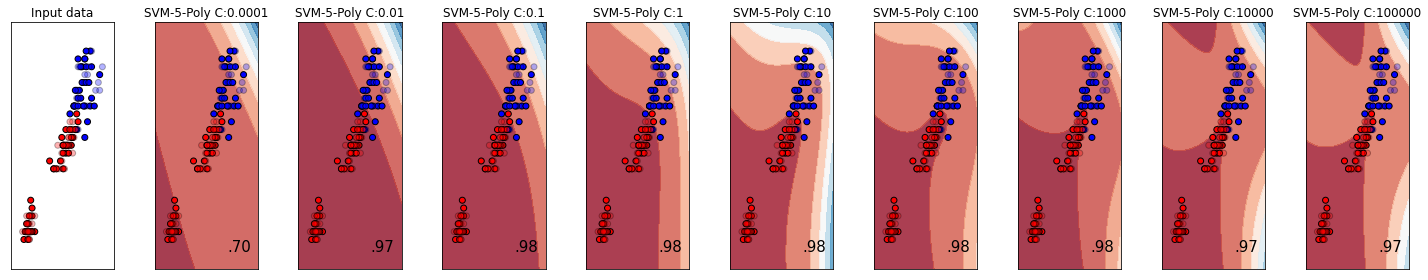

In [6]:
classifiers = []  #holds classifier according to C parameter
names = []

for i in [0.0001, 0.01, 0.1, 1, 10, 100,1000,10000,100000]:
  classifiers.append(SVC(C=i, kernel='poly', degree=5, gamma='scale', coef0=1.0))
  names.append("SVM-5-Poly C:" + str(i))

plot_2d_examples(classifiers, names, iris, figsize=(20,4))

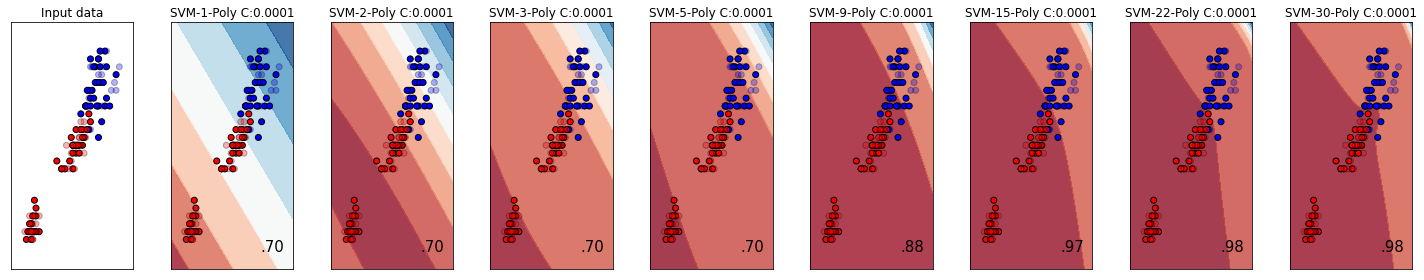

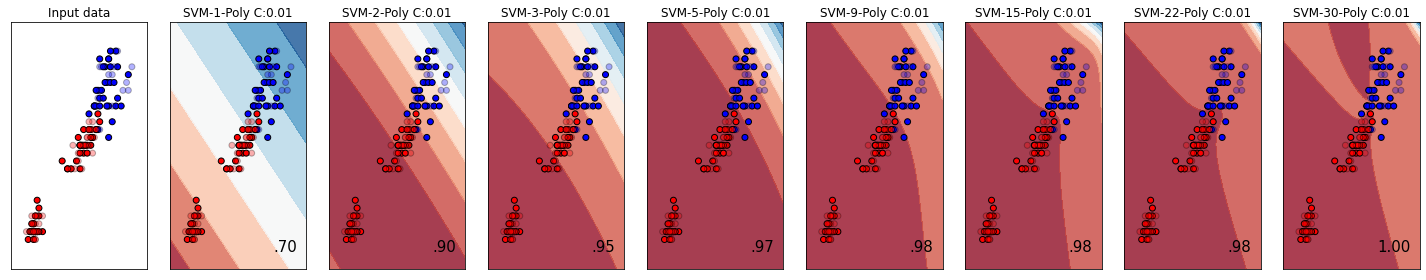

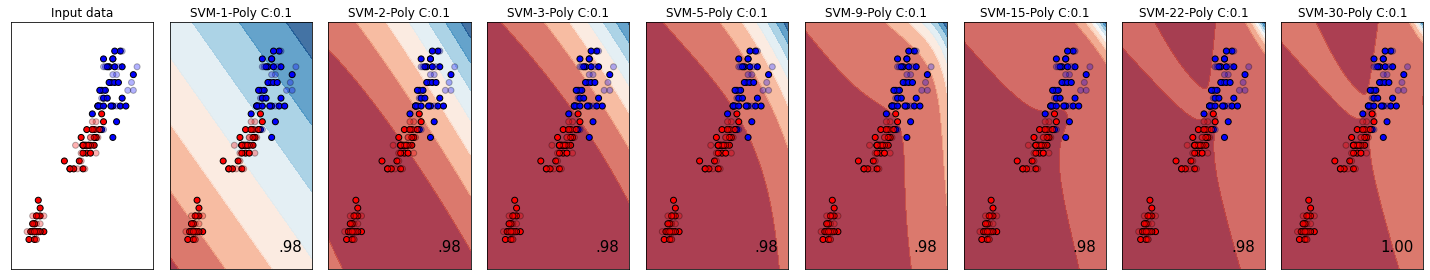

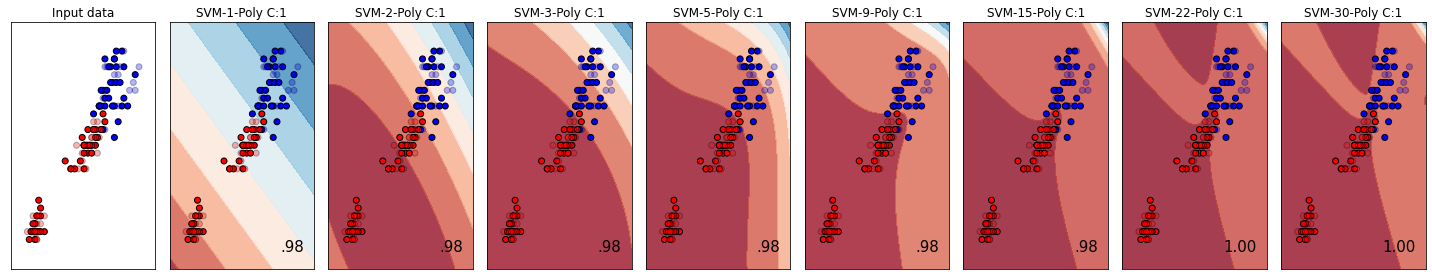

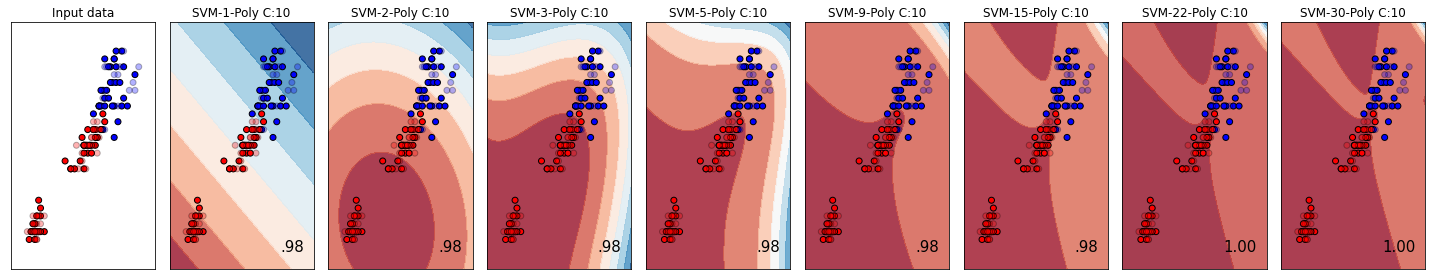

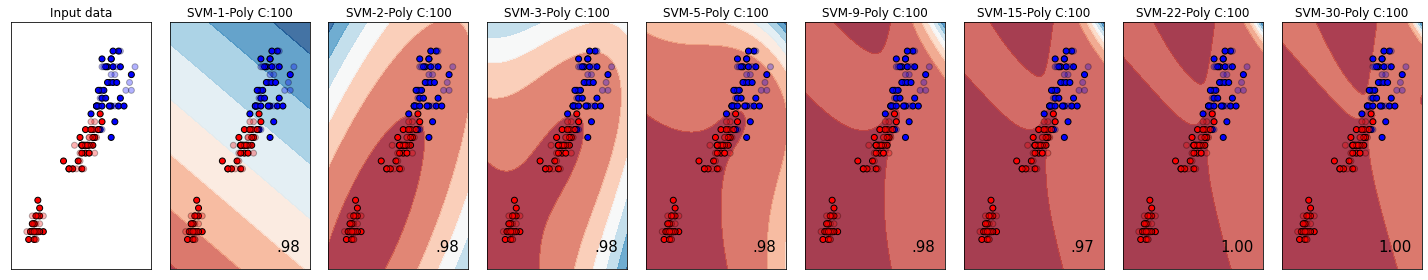

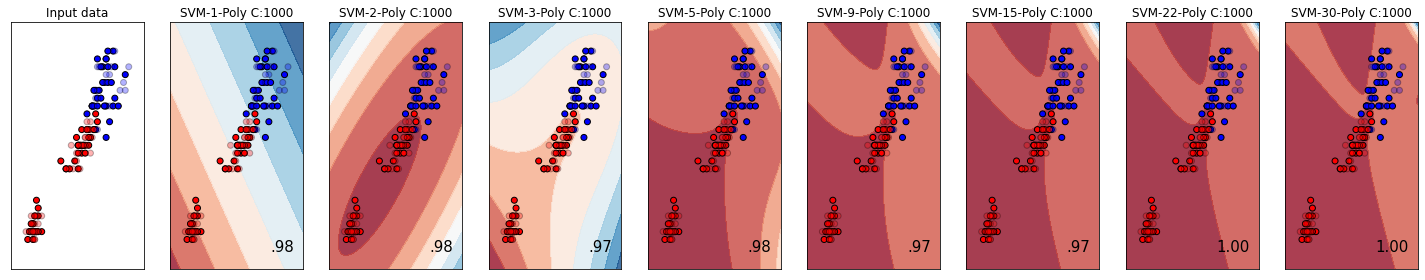

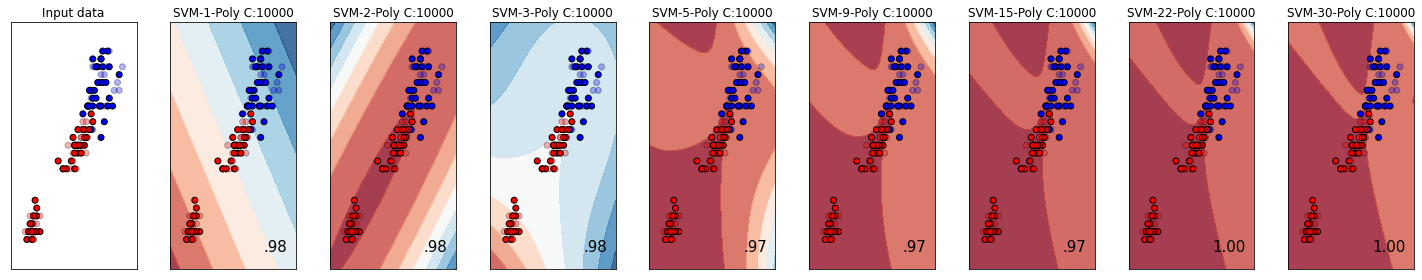

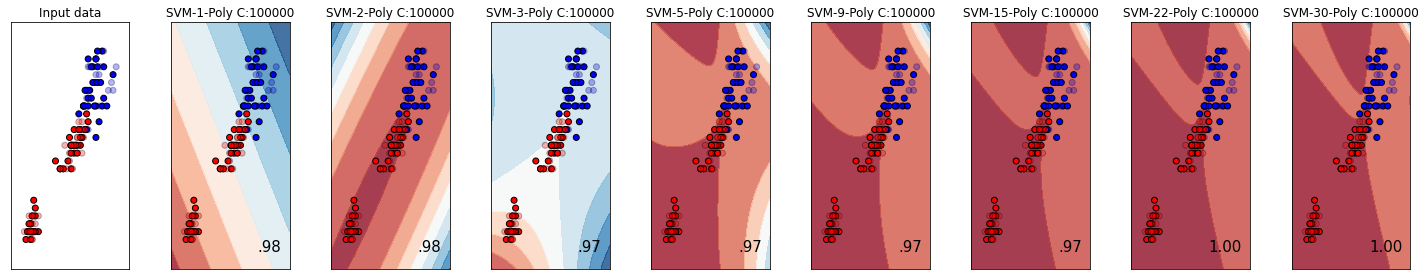

In [7]:
classifiers = []
names = []

for i in [0.0001, 0.01, 0.1, 1, 10, 100,1000,10000,100000]: #C
  for j in [1,2,3,5,9,15,22,30]: #degree
    classifiers.append(SVC(C=i, kernel='poly', degree=j, gamma='scale', coef0=1.0))
    names.append("SVM-"+str(j) + "-Poly C:" + str(i))

  plot_2d_examples(classifiers, names, iris, figsize=(20,4))
  classifiers = []
  names = []

5-)A margin is a separation gap between the two lines on the closest data points. The C parameter affects the margin. If parameter C is too large, it tries to fit as much data as it can, resulting in an overfit condition. If the C parameter is low, the margin value increases, thus creating a smoother separation between different classes.
The degree value decides whether the model function is a linear function or a polynomial function. If the degree is 1, we obtain a linear function. Line often creates an underfitting situation. If the degree is too high, the complexity of the model increases, which leads to an overfitting condition.
If we choose the degree parameter 3 and the c parameter 10, we will get the best result. 

6-)The C value adds a penalty for each misclassified data. C value this penalty will be low so it draws a high margin. If the C value is high, it tries to minimize misclassifications, thus drawing a low margin. Therefore, the margin value should neither be too low nor too large. The value of the C parameter in the SVC function in the Python library is 1 by default. So I think c values between 0.1 and 100 are a sensible choice. If we keep the degree value constant and only play with the C value, values after 100 will cause overfitting. Because the division between classes is sharper and every new data is likely to be misinterpreted.

REFERENCES:
#https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas : I used it to change the data inside the dataframe
#https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167  :I used it to understand the SVC function and its parameters
#I benefited from lecture presentations and sample codes covered in the course.


